In [3]:
import random
import string
import csv
import time
from done.AlgoTree import SuffixTree
from done.FmIndex import FMIndex
from done.suffix_array import search_pattern_with_suffix_array
from tracking_usage import track_time, track_memory
import matplotlib.pyplot as plt

In [ ]:


# Step 1: Generate Input Examples
def generate_random_inputs(num_samples=20, max_length=1000):
    inputs = []
    for _ in range(num_samples):
        text_length = random.randint(100, max_length)
        pattern_length = random.randint(2, 20)
        text = ''.join(random.choices(string.ascii_lowercase, k=text_length))
        start_index = random.randint(0, text_length - pattern_length - 1)
        pattern = text[start_index:start_index + pattern_length]
        inputs.append((text, pattern))
    return inputs

def save_inputs_to_csv(inputs, filename="inputs.csv"):
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Text", "Pattern"])
        writer.writerows(inputs)

# Step 2: Collect Performance Data
def collect_performance_data(inputs, output_file="performance_data.csv"):
    with open(output_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Algorithm", "Text Length", "Pattern Length", "Time (s)", "Memory (KB)"])
        
        for text, pattern in inputs:
            text_length = len(text)
            pattern_length = len(pattern)
            
            # Suffix Array
            time_suffix_array = track_time(lambda: search_pattern_with_suffix_array(text, pattern))
            memory_suffix_array = track_memory(lambda: search_pattern_with_suffix_array(text, pattern))
            writer.writerow(["Suffix Array", text_length, pattern_length, time_suffix_array, memory_suffix_array])

            # Suffix Tree
            suffix_tree = SuffixTree(text)
            time_exists = track_time(lambda: suffix_tree.find_substring(pattern))
            time_positions = track_time(lambda: suffix_tree.find_all_occurrences(pattern))
            memory_exists = track_memory(lambda: suffix_tree.find_substring(pattern))
            memory_positions = track_memory(lambda: suffix_tree.find_all_occurrences(pattern))
            total_time = time_exists + time_positions
            total_memory = memory_exists + memory_positions
            writer.writerow(["Suffix Tree", text_length, pattern_length, total_time, total_memory])

            # FM Index
            fm = FMIndex(text)
            time_count = track_time(lambda: fm.count(pattern))
            time_locate = track_time(lambda: fm.locate(pattern))
            memory_count = track_memory(lambda: fm.count(pattern))
            memory_locate = track_memory(lambda: fm.locate(pattern))
            total_time = time_count + time_locate
            total_memory = memory_count + memory_locate
            writer.writerow(["FM Index", text_length, pattern_length, total_time, total_memory])

# Step 3: Plot Results
def plot_performance_data(input_file="performance_data.csv"):
    data = {"Suffix Array": {"time": [], "memory": []},
            "Suffix Tree": {"time": [], "memory": []},
            "FM Index": {"time": [], "memory": []}}

    text_lengths = []

    with open(input_file, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            algorithm = row["Algorithm"]
            text_length = int(row["Text Length"])
            time = float(row["Time (s)"])
            memory = float(row["Memory (KB)"])
            
            data[algorithm]["time"].append(time)
            data[algorithm]["memory"].append(memory)
            if algorithm == "Suffix Array":
                text_lengths.append(text_length)

    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Time comparison
    plt.subplot(1, 2, 1)
    for algo in data:
        plt.plot(text_lengths, data[algo]["time"], label=algo)
    plt.title("Time Comparison")
    plt.xlabel("Text Length")
    plt.ylabel("Time (s)")
    plt.legend()
    
    # Memory comparison
    plt.subplot(1, 2, 2)
    for algo in data:
        plt.plot(text_lengths, data[algo]["memory"], label=algo)
    plt.title("Memory Comparison")
    plt.xlabel("Text Length")
    plt.ylabel("Memory (KB)")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Main script
if __name__ == "__main__":
    # # Generate inputs and save to CSV
    # inputs = generate_random_inputs()
    # save_inputs_to_csv(inputs)

    # # Collect performance data
    # collect_performance_data(inputs)

    # # Plot performance data
    # plot_performance_data()


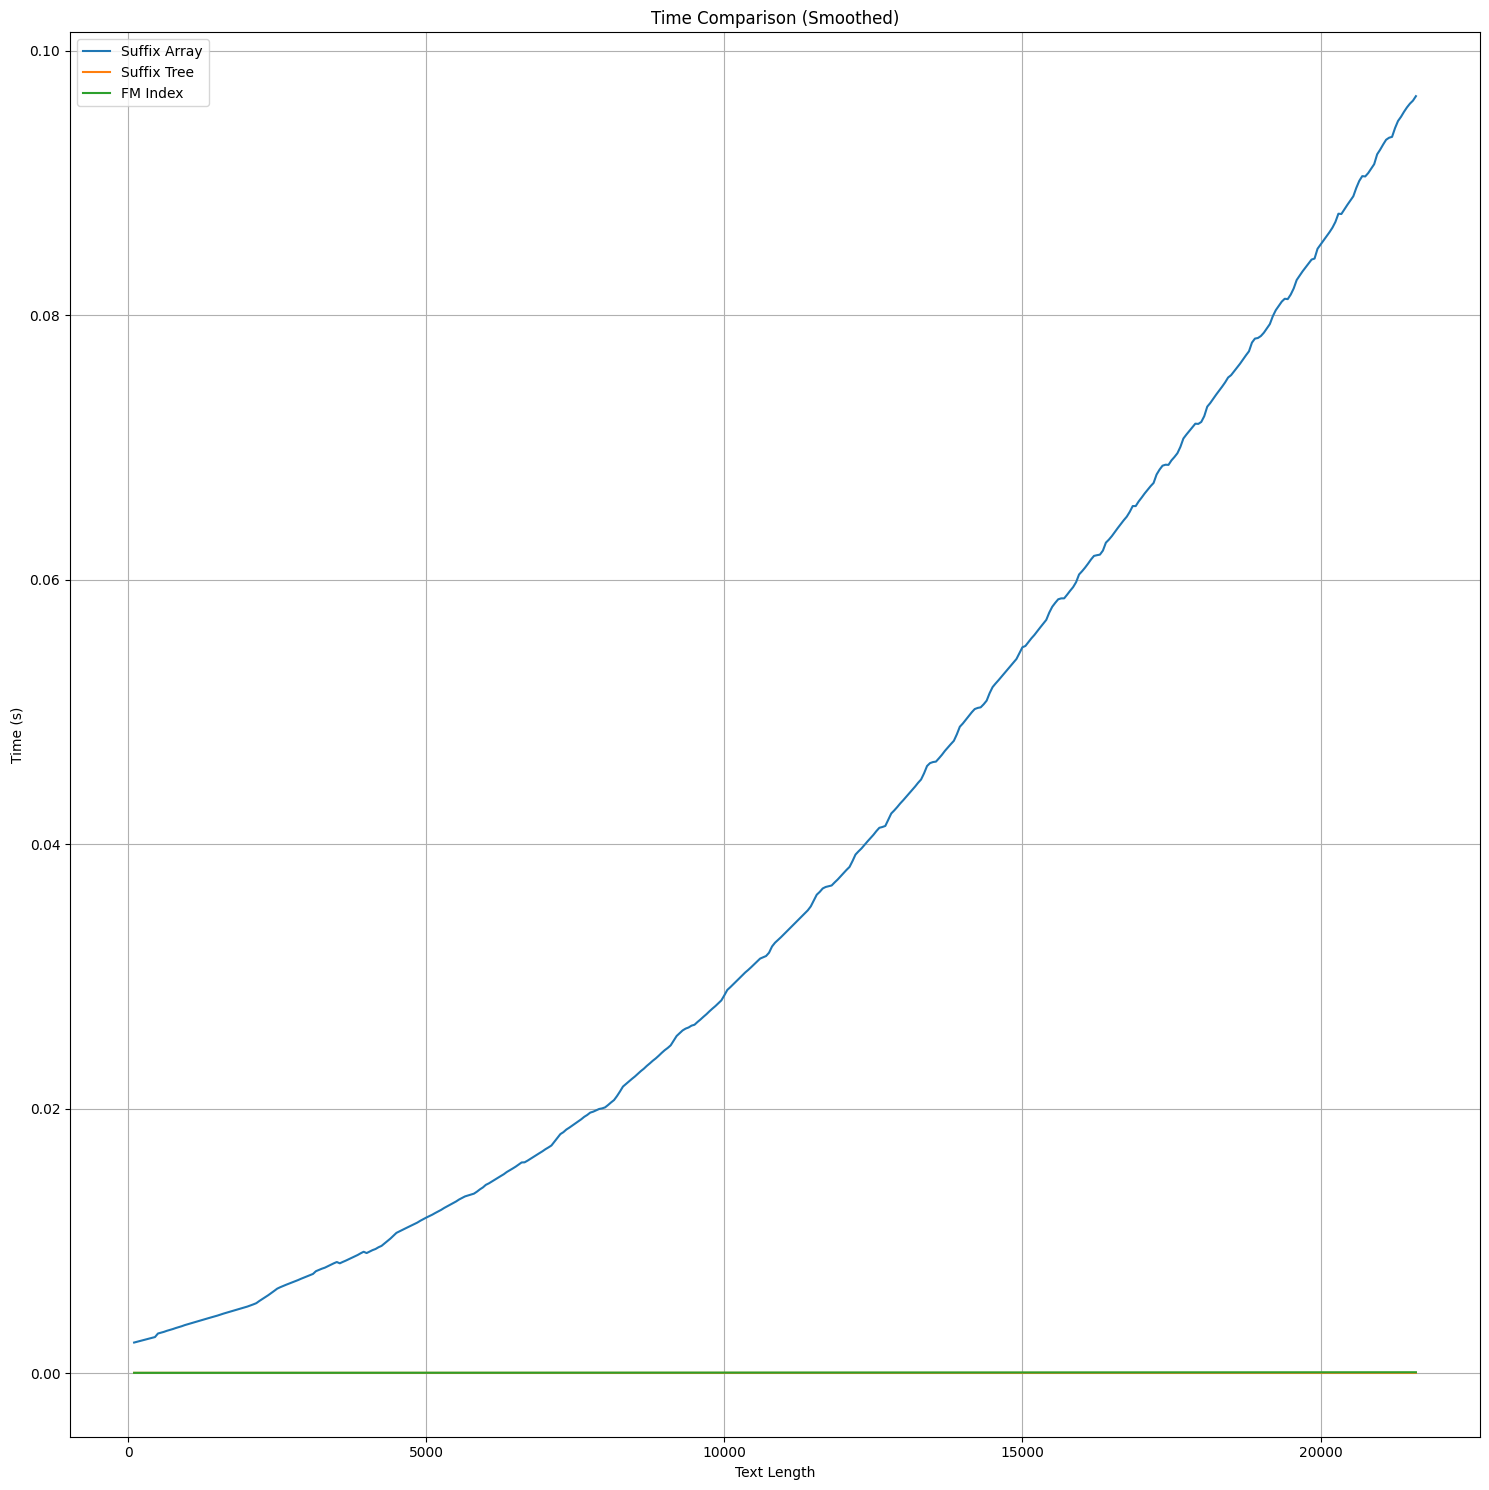

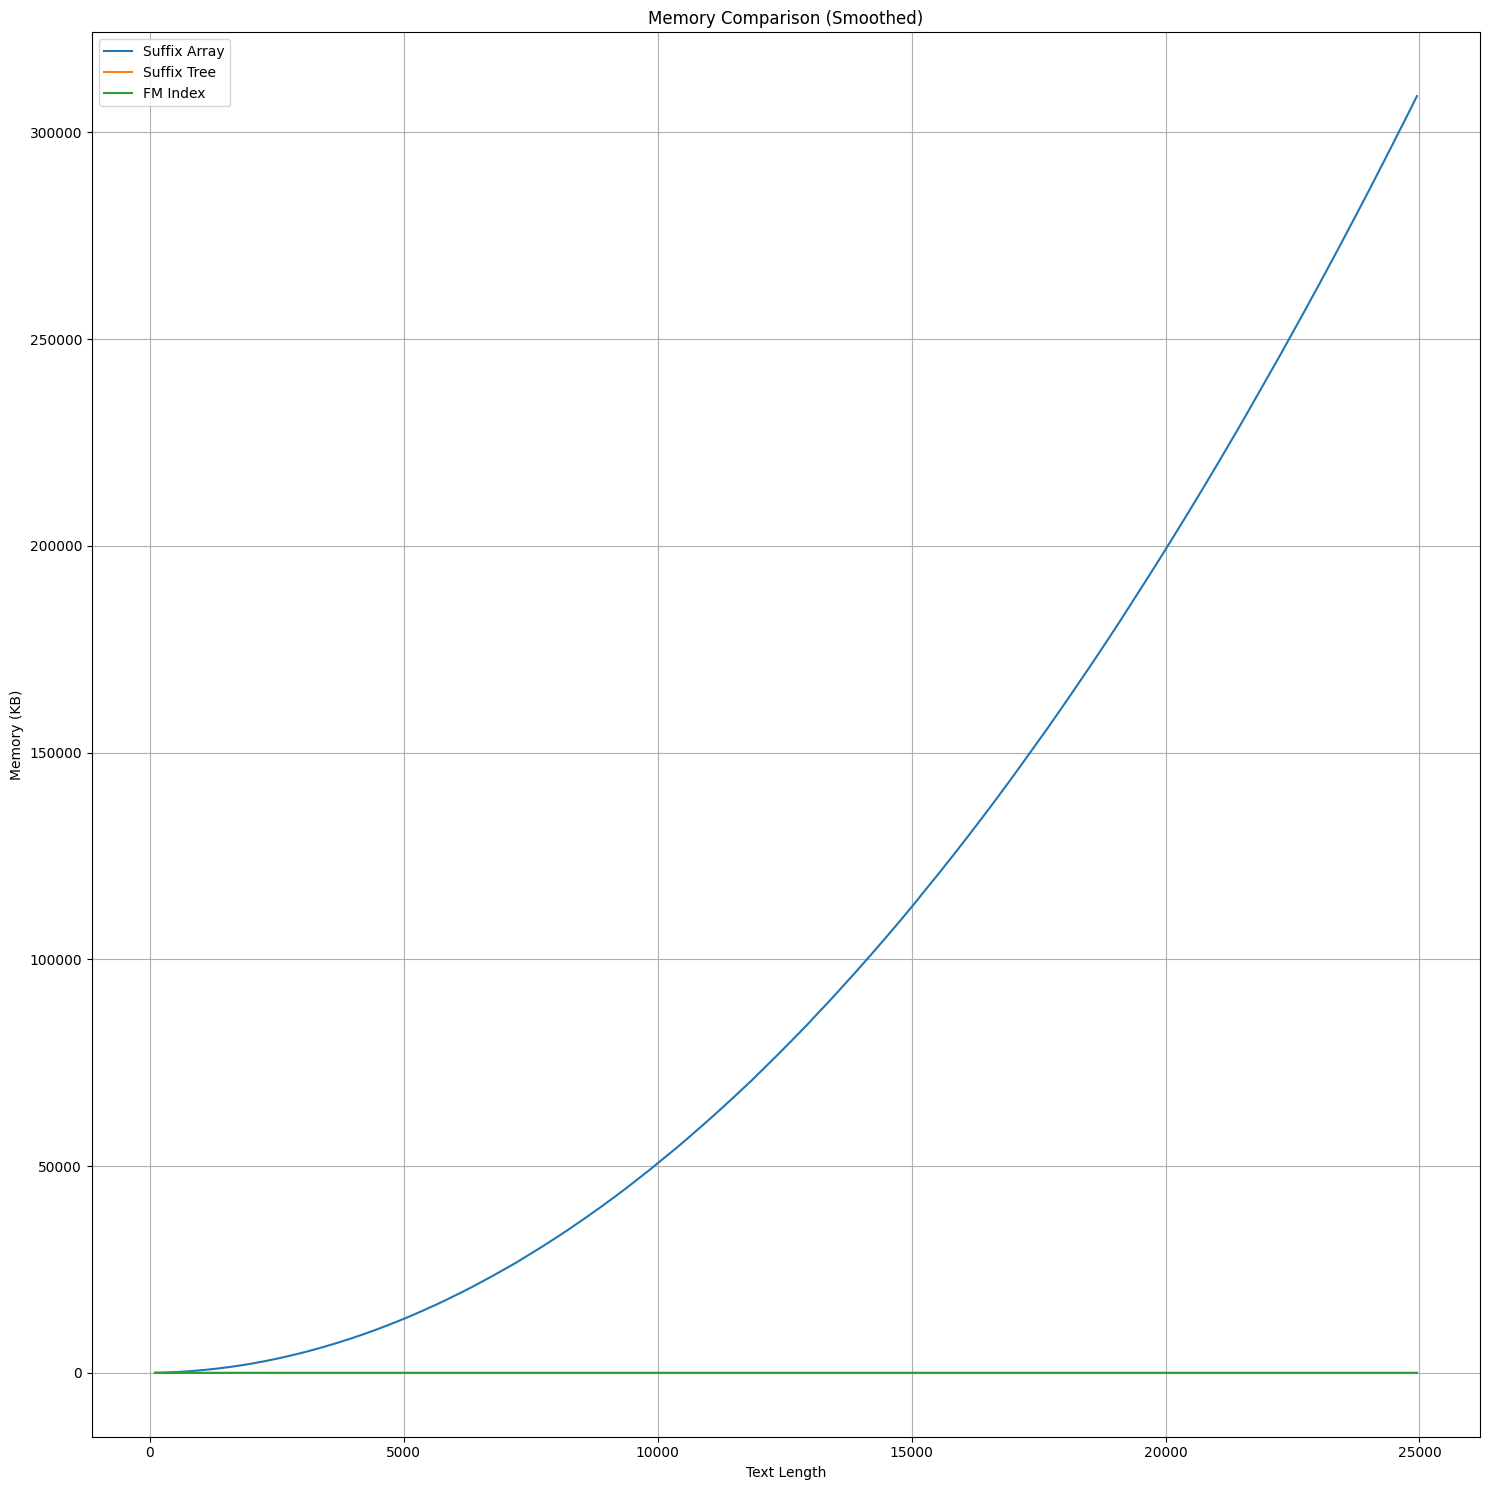

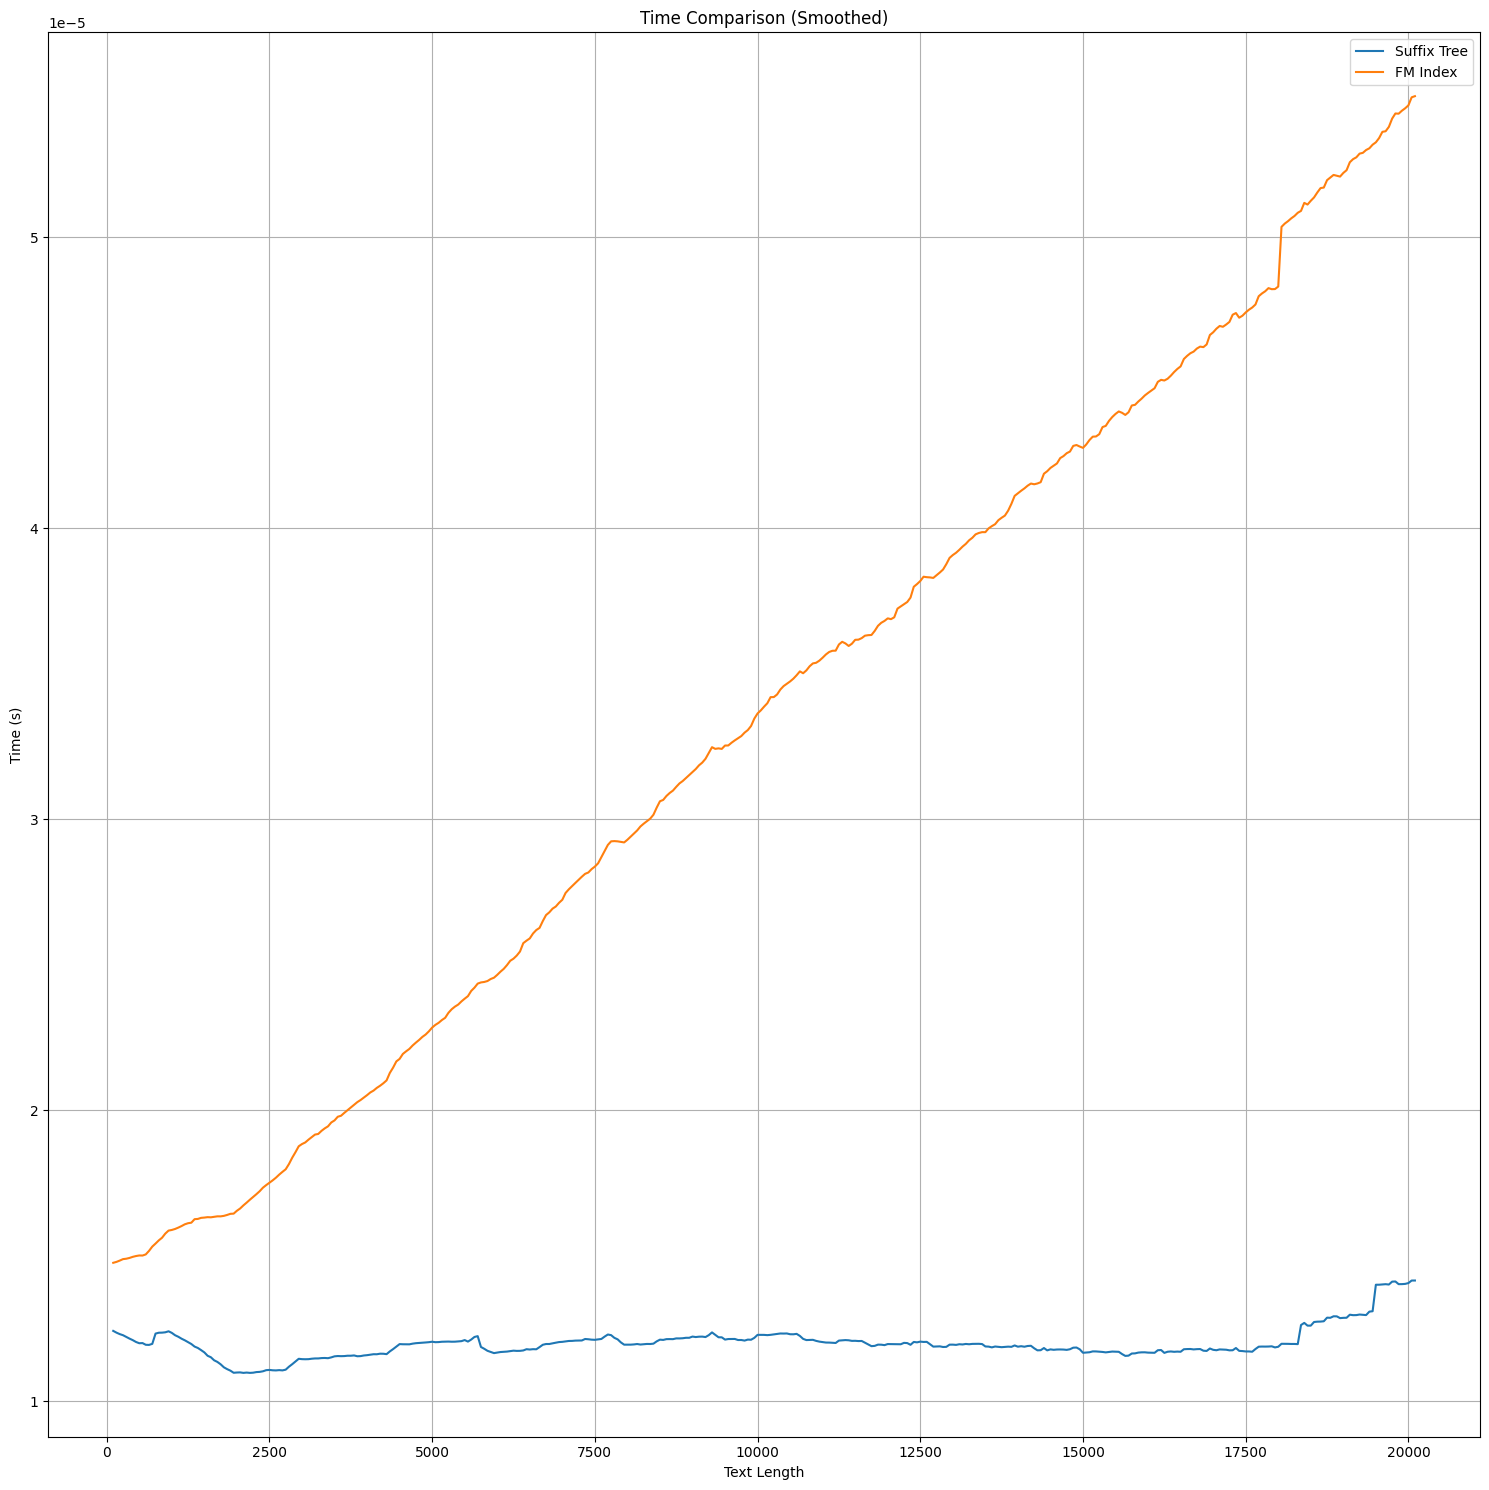

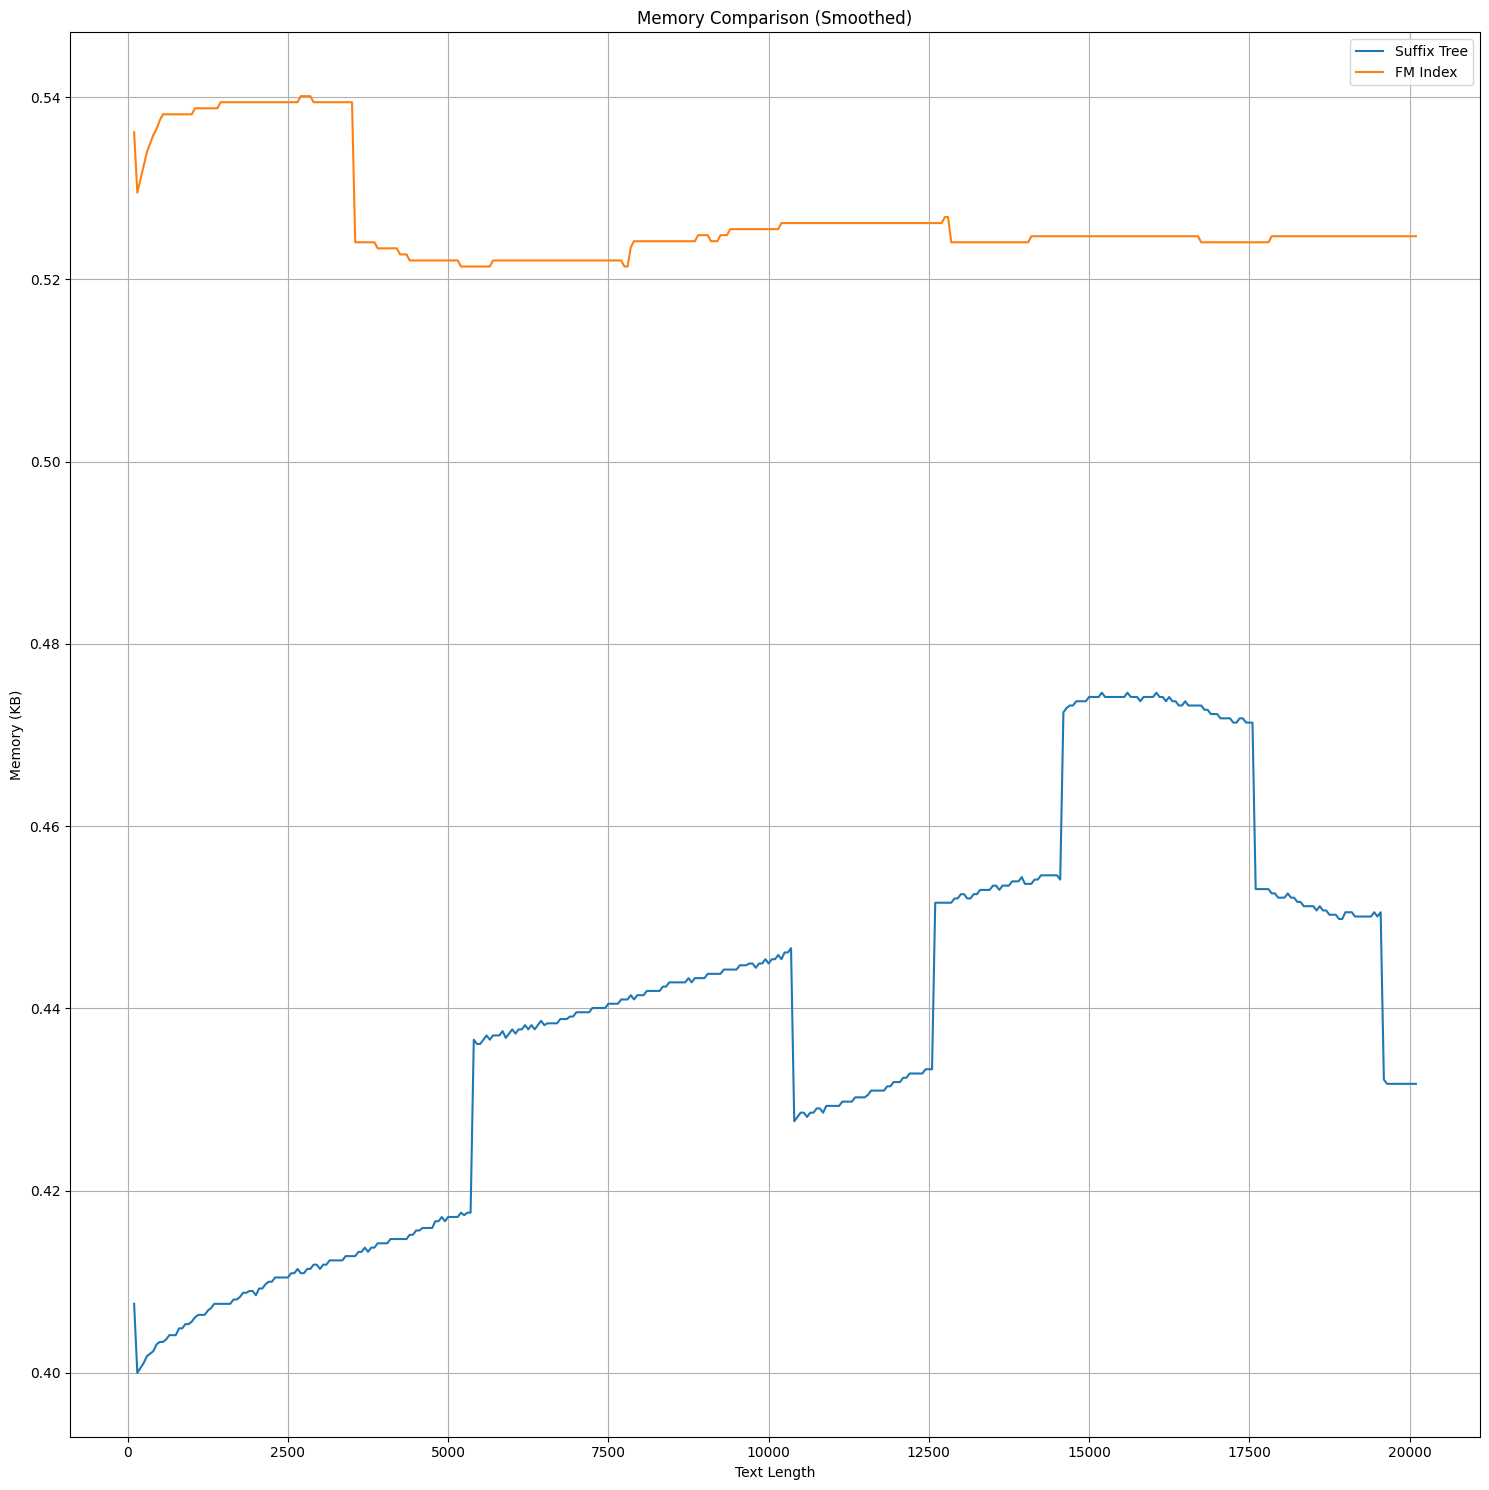

In [22]:
import csv
import matplotlib.pyplot as plt
import numpy as np

def moving_average(data, window_size=3):
    """Smooth data using a moving average."""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

input_file = "performance_data.csv"
data = {"Suffix Array": {"time": [], "memory": []},
        "Suffix Tree": {"time": [], "memory": []},
        "FM Index": {"time": [], "memory": []}}

text_lengths = []

with open(input_file, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        algorithm = row["Algorithm"]
        text_length = int(row["Text Length"])
        time = float(row["Time (s)"])
        memory = float(row["Memory (KB)"])
        
        data[algorithm]["time"].append(time)
        data[algorithm]["memory"].append(memory)
        if algorithm == "Suffix Array":
            text_lengths.append(text_length)

text_lengths = np.array(text_lengths)

plt.figure(figsize=(15, 15))############################ change dimentions
for algo in data:

    smoothed_time = moving_average(data[algo]["time"],window_size=70)
    smoothed_lengths = text_lengths[:len(smoothed_time)] 
    plt.plot(smoothed_lengths, smoothed_time, label=algo)
plt.title("Time Comparison (Smoothed)")
plt.xlabel("Text Length")
plt.ylabel("Time (s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 15))
for algo in data:

    smoothed_memory = moving_average(data[algo]["memory"])
    smoothed_lengths = text_lengths[:len(smoothed_memory)] 
    plt.plot(smoothed_lengths, smoothed_memory, label=algo)
plt.title("Memory Comparison (Smoothed)")
plt.xlabel("Text Length")
plt.ylabel("Memory (KB)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



data.pop("Suffix Array")


plt.figure(figsize=(15, 15))############################ change dimentions
for algo in data:
    smoothed_time = moving_average(data[algo]["time"],window_size=100)
    smoothed_lengths = text_lengths[:len(smoothed_time)] 
    plt.plot(smoothed_lengths, smoothed_time, label=algo)

plt.title("Time Comparison (Smoothed)")
plt.xlabel("Text Length")
plt.ylabel("Time (s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 15))
for algo in data:
    smoothed_memory = moving_average(data[algo]["memory"],window_size=100)
    smoothed_lengths = text_lengths[:len(smoothed_memory)] 
    plt.plot(smoothed_lengths, smoothed_memory, label=algo)

plt.title("Memory Comparison (Smoothed)")
plt.xlabel("Text Length")
plt.ylabel("Memory (KB)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import random
import csv
import time
from done.AlgoTree import SuffixTree
from done.FmIndex import FMIndex
from done.suffix_array import search_pattern_with_suffix_array
from tracking_usage import track_time, track_memory
import matplotlib.pyplot as plt


# Step 1: Generate Input Examples
def generate_formal_inputs(text_lengths, pattern_lengths):
    """
    Generate inputs with given text lengths and pattern lengths.
    Each pattern is a valid substring of its corresponding text.
    """
    inputs = []
    for text_length in text_lengths:
        text = ''.join(random.choices("abcdefghijklmnopqrstuvwxyz", k=text_length))
        for pattern_length in pattern_lengths:
            if pattern_length < text_length:
                start_index = random.randint(0, text_length - pattern_length - 1)
                pattern = text[start_index:start_index + pattern_length]
                inputs.append((text, pattern))
    return inputs


def save_inputs_to_csv(inputs, filename="inputs2.csv"):
    """
    Save generated inputs to a CSV file.
    """
    with open(filename, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Text", "Pattern"])
        writer.writerows(inputs)


# Step 2: Collect Performance Data
def collect_performance_data(inputs, output_file="performance_data2.csv"):
    """
    Measure performance of the algorithms and save results to a CSV file.
    """
    with open(output_file, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Algorithm", "Text Length", "Pattern Length", "Time (s)", "Memory (KB)"])

        for text, pattern in inputs:
            text_length = len(text)
            pattern_length = len(pattern)

            # Suffix Array
            time_suffix_array = track_time(lambda: search_pattern_with_suffix_array(text, pattern))
            memory_suffix_array = track_memory(lambda: search_pattern_with_suffix_array(text, pattern))
            writer.writerow(["Suffix Array", text_length, pattern_length, time_suffix_array, memory_suffix_array])

            # Suffix Tree
            suffix_tree = SuffixTree(text)
            time_positions = track_time(lambda: suffix_tree.find_all_occurrences(pattern))
            memory_positions = track_memory(lambda: suffix_tree.find_all_occurrences(pattern))
            writer.writerow(["Suffix Tree", text_length, pattern_length, time_positions, memory_positions])

            # FM Index
            fm = FMIndex(text)
            time_locate = track_time(lambda: fm.locate(pattern))
            memory_locate = track_memory(lambda: fm.locate(pattern))
            writer.writerow(["FM Index", text_length, pattern_length, time_locate, memory_locate])


# Step 3: Plot Results
def plot_performance_data(input_file="performance_data2.csv"):
    """
    Plot the performance data from the CSV file.
    """
    data = {"Suffix Array": {"time": [], "memory": []},
            "Suffix Tree": {"time": [], "memory": []},
            "FM Index": {"time": [], "memory": []}}

    text_lengths = []
    pattern_lengths = []

    with open(input_file, mode="r") as file:
        reader = csv.DictReader(file)
        for row in reader:
            algorithm = row["Algorithm"]
            text_length = int(row["Text Length"])
            pattern_length = int(row["Pattern Length"])
            time = float(row["Time (s)"])
            memory = float(row["Memory (KB)"])

            data[algorithm]["time"].append(time)
            data[algorithm]["memory"].append(memory)
            
            if algorithm == "Suffix Array":
                text_lengths.append((text_length, pattern_length))

    # Plotting
    plt.figure(figsize=(14, 7))

    # Time comparison
    plt.subplot(1, 2, 1)
    for algo in data:
        plt.plot(range(len(text_lengths)), data[algo]["time"], label=algo)
    plt.title("Time Comparison")
    plt.xlabel("Input Samples")
    plt.ylabel("Time (s)")
    plt.legend()

    # Memory comparison
    plt.subplot(1, 2, 2)
    for algo in data:
        plt.plot(range(len(text_lengths)), data[algo]["memory"], label=algo)
    plt.title("Memory Comparison")
    plt.xlabel("Input Samples")
    plt.ylabel("Memory (KB)")
    plt.legend()

    plt.tight_layout()
    plt.show()


# Main Script
if __name__ == "__main__":
    # Define text and pattern lengths
    text_lengths = [100, 200, 500, 1000, 2000, 5000]  # Different text lengths
    pattern_lengths = [5, 10, 20, 50, 100]           # Different pattern lengths

    # Generate inputs and save to CSV
    inputs = generate_formal_inputs(text_lengths, pattern_lengths)
    save_inputs_to_csv(inputs)

    # Collect performance data and save to CSV
    collect_performance_data(inputs)

    # Plot performance data
    plot_performance_data()
